# Objective: 

We will create a linear regression model to forecast sales figures using an advertising spend dataset. Furthermore, we will employ standard performance indicators like as R-squared and root mean squared error. We will also employ k-fold cross validation and regularization to limit the risk of overfitting in regression models.

In [26]:
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Regression
## Predicting blood glucose levels:

Let's use a dataset containing data women's health to predict glucose levels in the blood.

In [27]:
df = pd.read_csv('diabetes_clean.csv', index_col=None)
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Creating feature and target arrays:

In [28]:
diabetes_df = df.loc[(df['glucose'] != 0) & (df['bmi'] != 0)].copy()
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

print(type(X), type(y))
display(X[:5,:])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


array([[6.000e+00, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01, 6.270e-01,
        5.000e+01, 1.000e+00],
       [1.000e+00, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01, 3.510e-01,
        3.100e+01, 0.000e+00],
       [8.000e+00, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01, 6.720e-01,
        3.200e+01, 1.000e+00],
       [1.000e+00, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01, 1.670e-01,
        2.100e+01, 0.000e+00],
       [0.000e+00, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01, 2.288e+00,
        3.300e+01, 1.000e+00]])

## Making predictions from a single feature:

To begin, let us attempt to predict blood glucose levels using only one resource: the BMI.

In [29]:
X_bmi = X[:,4]
print(X_bmi[:5])
print(y.shape, X_bmi.shape) # confirm its shape

# sklearn use 2D data, so we reshape it
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

[33.6 26.6 23.3 28.1 43.1]
(752,) (752,)
(752, 1)


## Plotting glucose vs. body mass index:

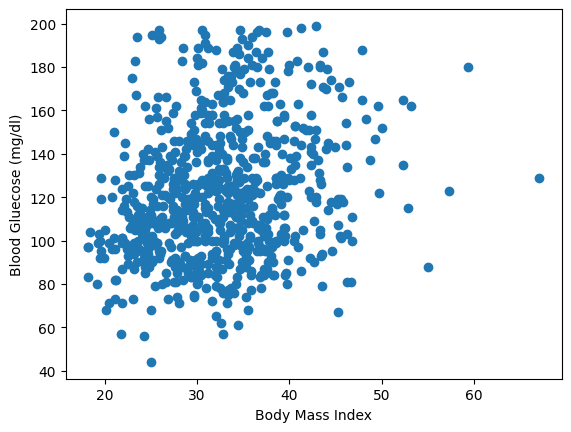

In [30]:
import matplotlib.pyplot as plt

plt.scatter(X_bmi, y)
plt.ylabel("Blood Gluecose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

## NOTE: 
We can see that as the body mass index rises, so do blood glucose levels.

## Fitting a regression model

Creating a regression model from data!

In [31]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_bmi, y)

LinearRegression()

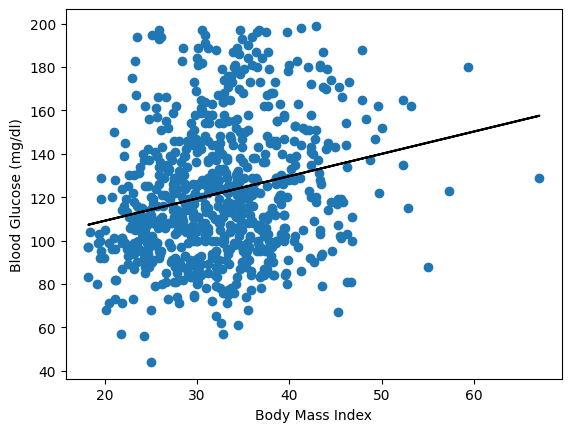

In [32]:
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi,y)
plt.plot(X_bmi, predictions, color='black')
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

There appears to be a weak to moderate positive correlation between blood glucose and body mass index.

# 1.1. Creating features

Now we'll work with a dataset called sales df, which contains information on advertising campaign expenditure across various media types, as well as the amount of money generated in sales for each campaign.

We use advertising expenditures as features to forecast sales values, beginning with the "radio" column. However, before you can make any predictions, you must first create the feature and target arrays and reshape them to the scikit-learn format.

**Instructions:**

Create X, an array of the values from the sales_df DataFrame's "radio" column.
Create y, an array of the values from the sales_df DataFrame's "sales" column.
Reshape X into a two-dimensional NumPy array.
Print the shape of X and y.


In [33]:
sales_df = pd.read_csv("advertising_and_sales_clean.csv", index_col=None)
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [34]:
import numpy as np

# Create X from the radio column's values (.values to make sure they are numpy array)
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


# 1.2. Building a linear regression model

We've now created feature and target arrays, and we're going to train a linear regression model on all of the feature and target values.

There is no need to divide the data into training and test sets because the goal is to assess the relationship between the feature and the target values.

The following X and Y have been preloaded for you:

python:

                          y = sales_df["sales"].values and
                          
                          
                          
                          X = sales_df["radio"].values.reshape(-1, 1)
                          
**Instructions:**

- Import LinearRegression.
- Instantiate a linear regression model.
- Predict sales values using X, storing as predictions.

In [35]:
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])


[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


See how sales values for the first five predictions range from 95,000 to over 290,000. Let's visualize the model's fit.

# 1.3. Visualizing a linear regression model

We can see how well the model fits the data now that we have built a linear regression model and trained it using all available observations. This enables us to deduce the relationship between radio advertising spending and sales values.

**Instructions:**

- Import matplotlib.pyplot as plt.
- Create a scatter plot visualizing y against X, with observations in blue.
- Draw a red line plot displaying the predictions against X.
- Display the plot.

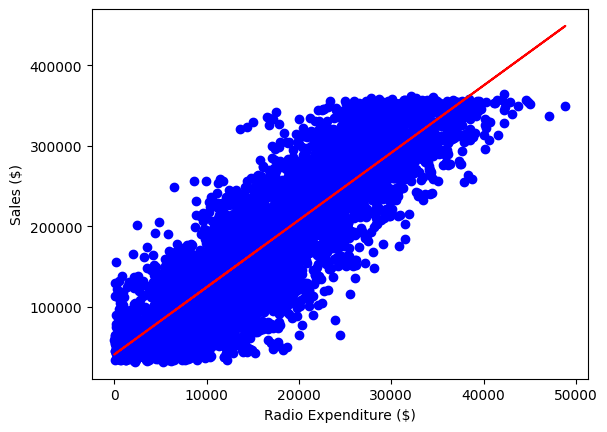

In [36]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X,y, color="blue")

# Create line plot
plt.plot(X,predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

The model nicely captures a linear correlation between radio advertising expenditure and sales! Now let's take a look at what is going on under the hood to calculate this relationship.

# 2. The basics of linear regression

![image](image.png)

![image-2](image-2.png)

![image-3](image-3.png)


To advoice, the positive Residuals cancel out the negative ones, we use Residual Sum of Squares (RSS). We aim to minimize the RSS.

![image-4](image-4.png)

![image-5](image-5.png)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create X from the radio column's values (.values to make sure they are numpy array)
features = ["tv",	"radio",	"social_media"]
X = sales_df[features].values

# Create y from the sales column's values
y = sales_df['sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

![image-6](image-6.png)

r-squared in linear regression range from 0 to 1.

R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%.

The R-squared may need to be above 0.95 for a regression model to be considered reliable.


In [38]:
reg_all.score(X_test, y_test)

0.9990152104759368

![image-7](image-7.png)


In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

2944.4331996001006

# 2.1. Fit and predict for regression

Our task is to build a multiple linear regression model using all of the features in the preloaded sales df dataset. This model will be used to forecast sales based on the values of the test features.

**Instructions:**

- Create X, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
- Instantiate a linear regression model.
- Fit the model to the training data.
- Create y_pred, making predictions for sales using the test features.

In [40]:
X = sales_df.drop(["sales","influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


The first two predictions appear to be within around 5% of the actual values from the test set!

# 2.2 Regression performance


Some popular regression metrics can be used to assess performance.

Our job is to determine how effectively the features explain the variance in the target values, as well as to evaluate the model's capacity to make predictions on unseen data.

Instructions:

- Import mean_squared_error.
- Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
- Calculate the model's root mean squared error using y_test and y_pred.
- Print r_squared and rmse.

In [41]:
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001006


The features explain 99.9% of the variance in sales values. Looks like this company's advertising strategy is working well!

# 3. Cross-Validation

Cross-validation motivation:

- Model performance is dependent on the way we split up the data
- Not representative of the model's ability to generalize to unseen data

![image-8](image-8.png)

Cross-validation and model performance:

- 5 folds = 5-fold CV
- 10 folds = 10-fold CV
- k folds = k-fold CV
- More folds = More computationally expensive


In [42]:
X = sales_df.drop(["tv","sales","influencer"], axis=1).values
y = sales_df["sales"].values
print(X.shape)

(4546, 2)


In [43]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()

cv_results = cross_val_score(reg, X, y, cv=kf)

# Evaluating cross-validation peformance
print(cv_results)
# [0.70262578, 0.7659624, 0.75188205, 0.76914482, 0.72551151, 0.73608277]
print(np.mean(cv_results), np.std(cv_results))
# 0.7418682216666667 0.023330243960652888
print(np.quantile(cv_results, [0.025, 0.975]))

[0.75187559 0.76589813 0.75262628 0.76412429 0.72538175 0.76308008]
0.7538310201432022 0.013854887619993731
[0.72869348 0.7656764 ]


The results are an array (each fold's result). The result is R-squared as it is the default metric for linear regression.

# 3.1. Cross-validation for R-squared

Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

We'll create a linear regression model, then use 6-fold cross-validation to see how well it is in predicting sales based on social media advertising spending. The individual score for each of the six-folds will be displayed.

Instructions:

- Import KFold and cross_val_score.
- Create kf by calling KFold(), setting the number of splits to six, shuffle to True, and setting a seed of 5.
- Perform cross-validation using reg on X and y, passing kf to cv.
- Print the cv_scores.

In [44]:
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores

Notice how R-squared for each fold ranged between 0.74 and 0.77? By using cross-validation, we can see how performance varies depending on how the data is split!

# 3.2. Analyzing cross-validation metrics

Now that we've completed cross-validation, it's time to examine the results.

Instructions:

- Calculate and print the mean of the results.
- Calculate and print the standard deviation of cv_results.
- Display the 95% confidence interval for your results using np.quantile().


In [45]:
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

0.7538310201432022
0.013854887619993731
[0.72869348 0.7656764 ]


An average score of 0.75 with a low standard deviation is pretty good for a model out of the box! Now let's learn how to apply regularization to our regression models.

# 4. Regularized regression

Why regularize?

- Recall: Linear regression minimizes a loss function
- It chooses a coefficient, a, for each feature variable, plus b
- Large coefficient can lead to overfitting
- Regularization: Penalize large coefficients

## 4.1 Ridge regression

![image-10](image-10.png)

Ridge penalizes large positive or negative coe)cients α: parameter we need to choose Picking α is similar to picking k in KNN Hyperparameter: variable used to optimize model parameters α controls model complexity.

- α = 0 = OLS (Can lead to overfitting)
- Very high α: Can lead to underfitting


In [46]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0, 10000]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
    
print(scores)

[0.3537878125998851, 0.3536407299494274, 0.3512426958613931, 0.3110510827436759, 0.22518335310369986, 0.19760748574775477]


Performance get worse as alpha increases.

## 4.2 Lasso regression

![image-11](image-11.png)


In [48]:
from sklearn.linear_model import Lasso
scores = []

for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
    
print(scores)

[0.35382844148854886, 0.3438049456776029, 0.19833321142742255, 0.18342320274518353, 0.14538765319821068]


USE Lasso regression for feature selection:

- Lasso can select important features of a dataset
- Shrinks the coe)cients of less important features to zero
- Features not shrunk to zero are selected by lasso

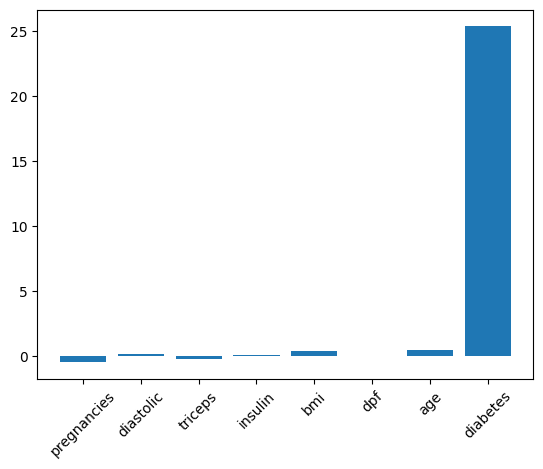

In [49]:
from sklearn.linear_model import Lasso

X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns


lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

## 4.3. egularized regression: Ridge

Ridge regression regularizes the loss function by computing the squared values of the model parameters multiplied by alpha and adding them to it.

In its turn, we fit ridge regression models with varying alpha values and print the results. To predict "sales," we use all of the features in the sales df dataset.

Instructions:

- Import Ridge.
- Instantiate Ridge, setting alpha equal to alpha.
- Fit the model to the training data.
- Calculate the score for each iteration of ridge.

In [50]:
X = sales_df.drop(["sales","influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)

(3182, 3)


In [51]:
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha = alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur!

## 4.4 Lasso regression for feature importance

[ 3.56256962 -0.00397035  0.00496385]


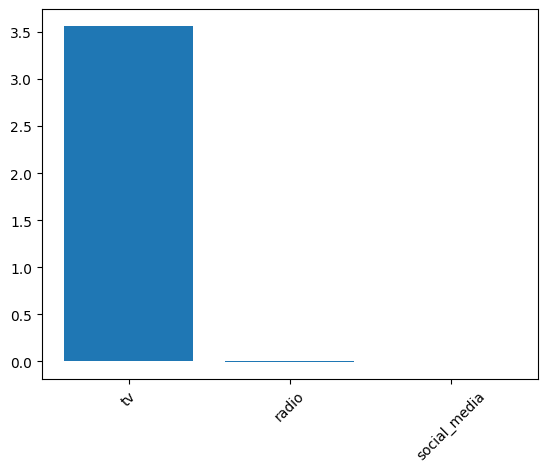

In [52]:
sales_columns = ['tv', 'radio', 'social_media'] 
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

See how the figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values! In the next chapter, we will learn how to further assess and improve our model's performance!